In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://www.imdb.com/chart/top/'
header = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
page = requests.get(url, headers=header)


if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')
    
    movies = []
    for i in soup.find_all("script", type="application/ld+json"):
        data = json.loads(i.string)
        a=1
        for item in data.get("itemListElement"):
            movie = {
                    "Rank": a,
                    "Title": item.get("item", {}).get("name"),
                    "URL": item.get("item", {}).get("url"),
                    "Rating": item.get("item", {}).get("aggregateRating", {}).get("ratingValue"),
                    "Content_Rating": item.get("item", {}).get("contentRating"),
                    "Rating_Count": item.get("item", {}).get("aggregateRating", {}).get("ratingCount"),
                    "Genre": item.get("item", {}).get("genre"),
                    "Duration": item.get("item", {}).get("duration").replace("PT", ""),
                    "Description": item.get("item", {}).get("description"),
                }
            movies.append(movie)
            a=a+1
else:
    print(f"Failed to fetch data.")

In [12]:
for index, movie in enumerate(movies, start=1):
        print(f"Rank: {index}\n"
              f"Title: {movie['Title']}\n"
              f"URL: {movie['URL']}\n"
              f"Rating: {movie['Rating']}\n"
              f"Rating Count: {movie['Rating_Count']}\n"
              f"Content Rating: {movie['Content_Rating']}\n"
              f"Genre: {movie['Genre']}\n"
              f"Duration: {movie['Duration'].replace('PT','')}\n"
              f"Description: {movie['Description']}\n")

Rank: 1
Title: The Shawshank Redemption
URL: https://www.imdb.com/title/tt0111161/
Rating: 9.3
Rating Count: 2993114
Content Rating: R
Genre: Drama
Duration: 2H22M
Description: A banker convicted of uxoricide forms a friendship over a quarter century with a hardened convict, while maintaining his innocence and trying to remain hopeful through simple compassion.

Rank: 2
Title: The Godfather
URL: https://www.imdb.com/title/tt0068646/
Rating: 9.2
Rating Count: 2089195
Content Rating: R
Genre: Crime, Drama
Duration: 2H55M
Description: The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.

Rank: 3
Title: The Dark Knight
URL: https://www.imdb.com/title/tt0468569/
Rating: 9
Rating Count: 2972913
Content Rating: PG-13
Genre: Action, Crime, Drama
Duration: 2H32M
Description: When a menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman, James Gordon and Harvey Dent must work together to put an end to the ma

In [16]:
df=pd.DataFrame(movies)
df

,Rank,Title,URL,Rating,Content_Rating,Rating_Count,Genre,Duration,Description
0,1,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,R,2993114,Drama,2H22M,A banker convicted of uxoricide forms a friend...
1,2,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,R,2089195,"Crime, Drama",2H55M,The aging patriarch of an organized crime dyna...
2,3,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,PG-13,2972913,"Action, Crime, Drama",2H32M,When a menace known as the Joker wreaks havoc ...
3,4,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,R,1408919,"Crime, Drama",3H22M,The early life and career of Vito Corleone in ...
4,5,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,Approved,906136,"Crime, Drama",1H36M,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
245,246,Amores perros,https://www.imdb.com/title/tt0245712/,8.0,R,258392,"Drama, Thriller",2H34M,"An amateur dog fighter, a supermodel, and a de..."
246,247,The Help,https://www.imdb.com/title/tt1454029/,8.1,PG-13,506608,Drama,2H26M,An aspiring author during the civil rights mov...
247,248,Rebecca,https://www.imdb.com/title/tt0032976/,8.1,Approved,151159,"Drama, Mystery, Romance",2H10M,A self-conscious woman juggles adjusting to he...
248,249,Koe no katachi,https://www.imdb.com/title/tt5323662/,8.1,Not Rated,113197,"Animation, Drama",2H10M,"A deaf girl, Shoko, is bullied by the popular ..."


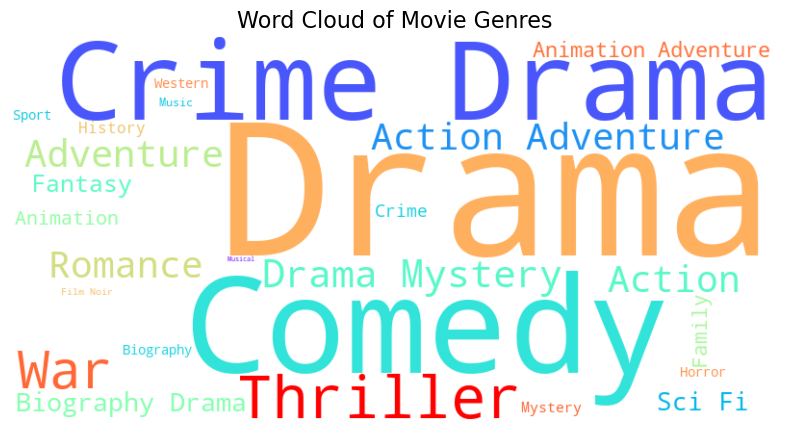

In [6]:
from wordcloud import WordCloud
genres = " ".join([genre for sublist in df['Genre'].dropna() for genre in sublist if isinstance(sublist, list)] 
                  if isinstance(df['Genre'].iloc[0], list) else df['Genre'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rainbow').generate(genres)

# Step 4: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Genres", fontsize=16)
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DeLL\AppData\Local\Temp\ipykernel_9520\3613270751.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)H(\d+)?M').fillna(0).apply(lambda x: int(x[0])*60 + int(x[1]), axis=1)


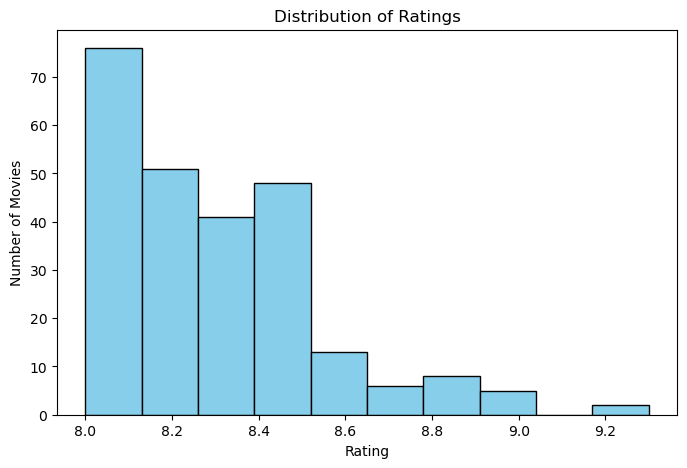

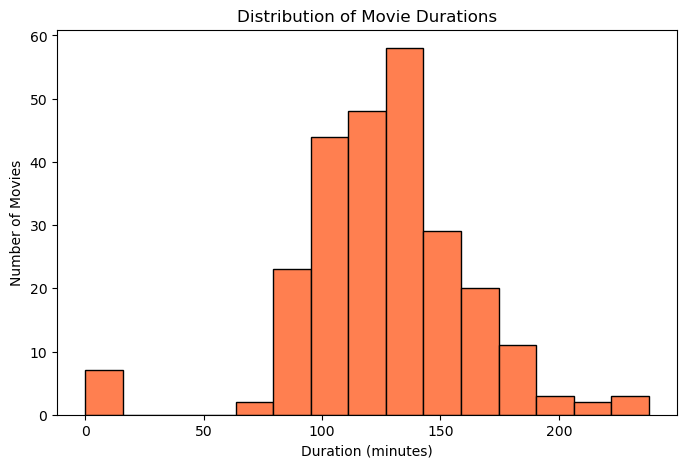

C:\Users\DeLL\AppData\Local\Temp\ipykernel_9520\3613270751.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating_Count', y='Title', data=top_10_rated, palette='mako')


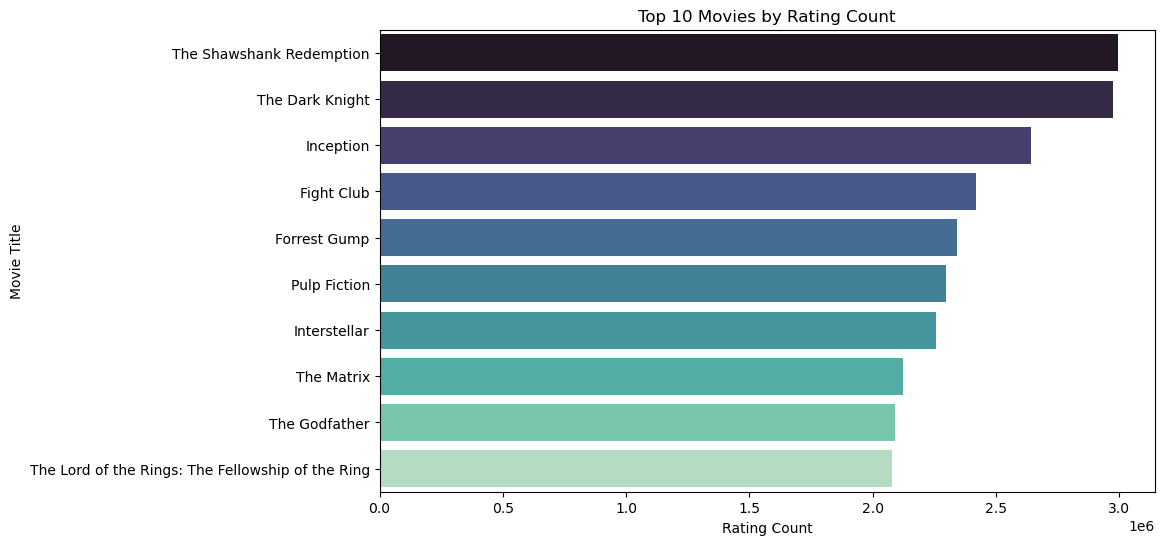

In [3]:
# 1. Ratings Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

# 4. Duration Analysis
# Convert durations to minutes if needed
df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)H(\d+)?M').fillna(0).apply(lambda x: int(x[0])*60 + int(x[1]), axis=1)

plt.figure(figsize=(8, 5))
plt.hist(df['Duration_Minutes'], bins=15, color='coral', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

# 5. Top 10 Movies by Rating Count
top_10_rated = df.nlargest(10, 'Rating_Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating_Count', y='Title', data=top_10_rated, palette='mako')
plt.title('Top 10 Movies by Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Movie Title')
plt.show()

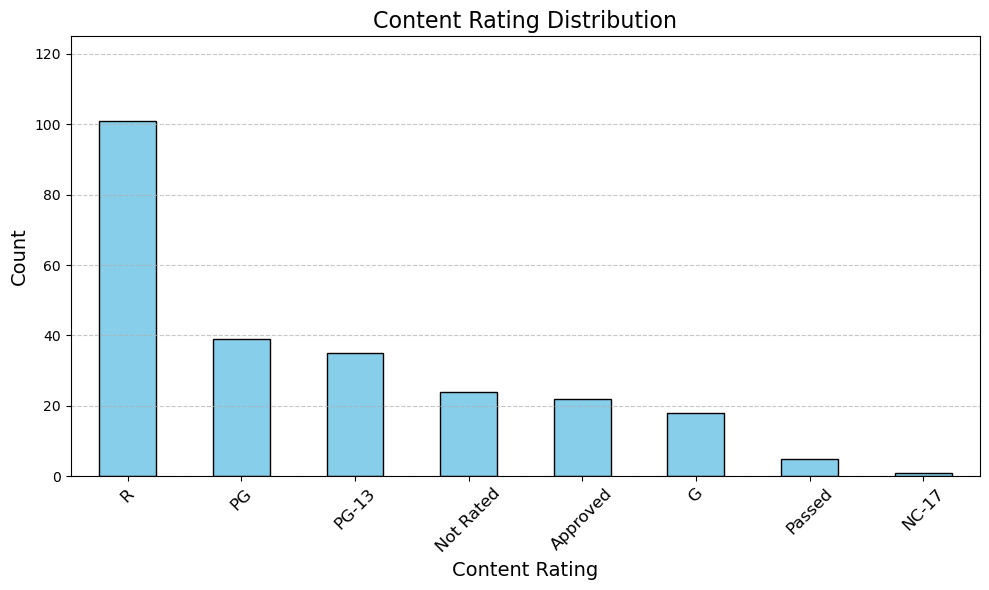

In [4]:
x1 = df['Content_Rating'].value_counts()

plt.figure(figsize=(10, 6))
x1.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Content Rating Distribution', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0,125)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

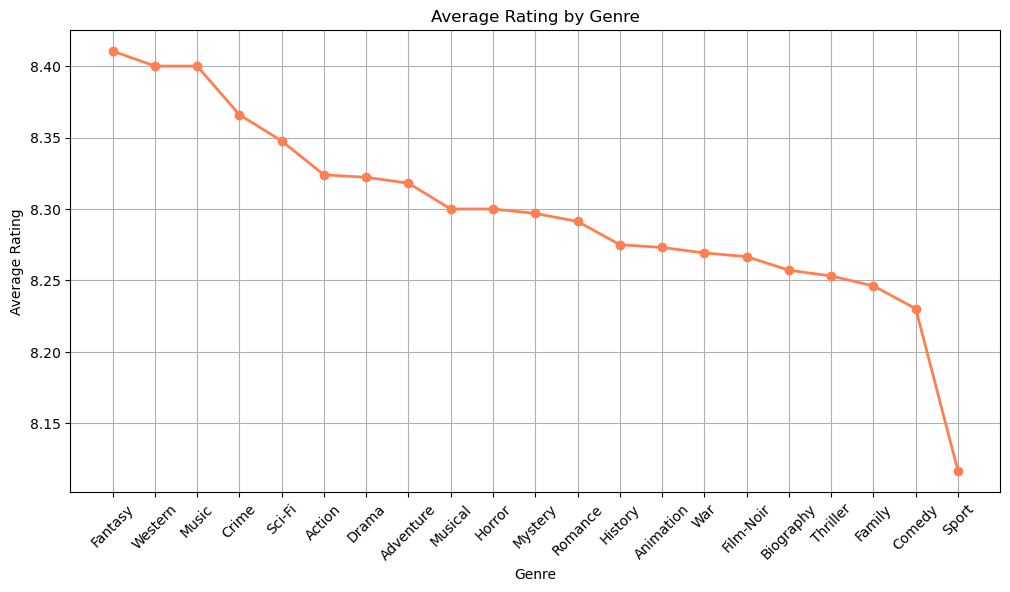

In [5]:
# Ensure Genre column is split into lists
df['Genre'] = df['Genre'].str.split(', ')

# Explode the Genre column
genre_avg_rating = df.explode('Genre')

# Group by Genre and calculate average rating
genre_avg_rating = genre_avg_rating.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plotting the result as a line chart
plt.figure(figsize=(12, 6))
plt.plot(genre_avg_rating.index, genre_avg_rating.values, marker='o', color='coral', linestyle='-', linewidth=2)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

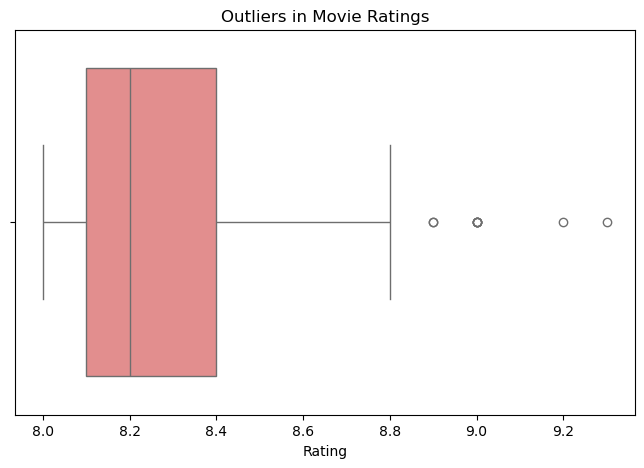

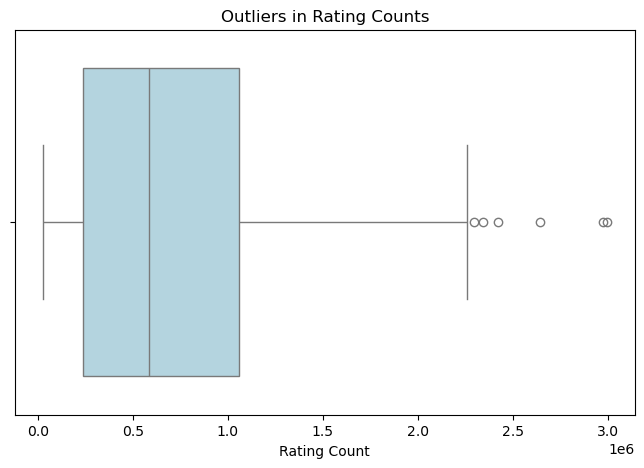

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'], color='lightcoral')
plt.title('Outliers in Movie Ratings')
plt.xlabel('Rating')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating_Count'], color='lightblue')
plt.title('Outliers in Rating Counts')
plt.xlabel('Rating Count')
plt.show()

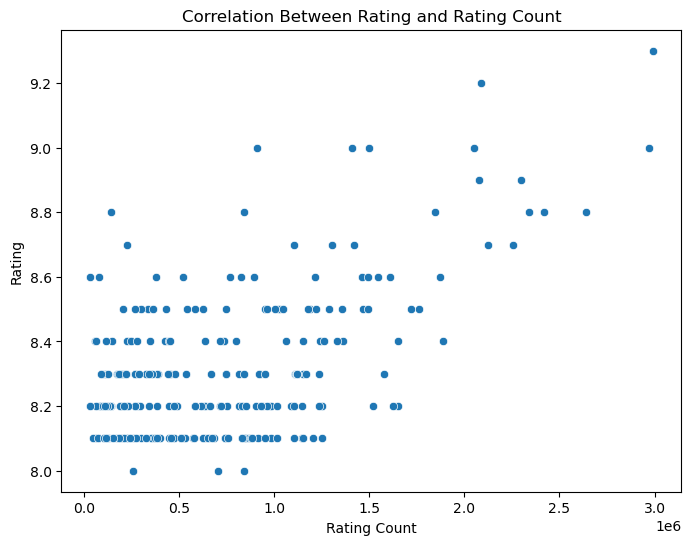

Correlation between Rating and Rating Count:
                 Rating  Rating_Count
Rating        1.000000      0.582062
Rating_Count  0.582062      1.000000


In [8]:
# Scatter plot to check correlation between Rating and Rating Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating_Count', y='Rating', data=df)
plt.title('Correlation Between Rating and Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

# Correlation coefficient
correlation = df[['Rating', 'Rating_Count']].corr()
print("Correlation between Rating and Rating Count:\n", correlation)


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Step 1: Fetch the data from IMDB's Top 250 Movies page
url = 'https://www.imdb.com/chart/top/'
header = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
page = requests.get(url, headers=header)

if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')
    
    movies = []
    for script in soup.find_all("script", type="application/ld+json"):
        data = json.loads(script.string)
        rank = 1
        for item in data.get("itemListElement", []):
            movie = {
                "Rank": rank,
                "Title": item.get("item", {}).get("name"),
                "URL": f"https://www.imdb.com{item.get('item', {}).get('url')}",
                "Rating": item.get("item", {}).get("aggregateRating", {}).get("ratingValue"),
                "Content_Rating": item.get("item", {}).get("contentRating"),
                "Rating_Count": item.get("item", {}).get("aggregateRating", {}).get("ratingCount"),
                "Genre": item.get("item", {}).get("genre"),
                "Duration": item.get("item", {}).get("duration", "").replace("PT", ""),
                "Description": item.get("item", {}).get("description")
            }
            movies.append(movie)
            rank += 1

    # Create a DataFrame
    df = pd.DataFrame(movies)

    # Step 2: Provide options for user input
    while True:
        print("\nMenu:")
        print("1. Search by Rank")
        print("2. Search by Rating")
        print("3. View Available Genres")
        print("4. Exit")
        choice = int(input("Enter your choice: "))

        if choice == 1:  # Search by Rank
            rank_input = int(input("Enter the rank of the movie: "))
            movie = df[df['Rank'] == rank_input]
            if not movie.empty:
                print("\nMovie Details:")
                print(movie.to_markdown(index=False))
            else:
                print("No movie found with the given rank.")

        elif choice == 2:  # Search by Rating
            rating_input = float(input("Enter the minimum rating (e.g., 9.0): "))
            filtered_movies = df[df['Rating'] >= rating_input]
            if not filtered_movies.empty:
                print("\nMovies with Rating >= {}:".format(rating_input))
                print(filtered_movies.to_markdown(index=False))
            else:
                print("No movies found with the given rating.")

        elif choice == 3:  # View Available Genres
            all_genres = set(genre for sublist in df['Genre'].dropna().str.split(', ') for genre in sublist)
            print("\nAvailable Genres:")
            for genre in sorted(all_genres):
                print(genre)
            
            genre_input = input("\nEnter a genre to filter movies: ")
            filtered_movies = df[df['Genre'].str.contains(genre_input, na=False)]
            if not filtered_movies.empty:
                print(f"\nMovies in Genre: {genre_input}")
                print(filtered_movies.to_markdown(index=False))
            else:
                print("No movies found in this genre.")

        elif choice == 4:  # Exit
            print("Exiting. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {page.status_code}")


Menu:
1. Search by Rank
2. Search by Rating
3. View Available Genres
4. Exit


Enter your choice:  1
Enter the rank of the movie:  247



Movie Details:
|   Rank | Title    | URL                                                       |   Rating | Content_Rating   |   Rating_Count | Genre   | Duration   | Description                                                                                                                                                                                                                                    |
|-------:|:---------|:----------------------------------------------------------|---------:|:-----------------|---------------:|:--------|:-----------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|    247 | The Help | https://www.imdb.comhttps://www.imdb.com/title/tt1454029/ |      8.1 | PG-13            |         506608 | Drama   | 2H26M      | An aspiring author during the civil rights mov

Enter your choice:  2
Enter the minimum rating (e.g., 9.0):  5



Movies with Rating >= 5.0:
|   Rank | Title                                                                | URL                                                        |   Rating | Content_Rating   |   Rating_Count | Genre                         | Duration   | Description                                                                                                                                                                                                                                      |
|-------:|:---------------------------------------------------------------------|:-----------------------------------------------------------|---------:|:-----------------|---------------:|:------------------------------|:-----------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|      1 | The S

Enter your choice:  45


Invalid choice. Please try again.

Menu:
1. Search by Rank
2. Search by Rating
3. View Available Genres
4. Exit


KeyboardInterrupt: Interrupted by user